In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.tsa.api import VAR

In [3]:
#question4
df = pd.read_csv("snp_allstocks_2015_2019.csv") 
df = df.set_index("Date")
info = pd.read_csv("snp_info.csv") 
info.drop(columns=info.columns[0], inplace=True)

In [4]:
tickers = [ "CAG" , "MAR" , "LIN", "HCP", "MAT"] 
stocks = df [ tickers ]
stocks_ma = stocks . rolling (window=66).mean() 
stocks_detrended = stocks.sub(stocks_ma).dropna()

In [5]:
model = VAR(stocks_detrended) 
results = model.fit (1)
A= results.params[1:].values 
eigA, _=np.linalg.eig(A)

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


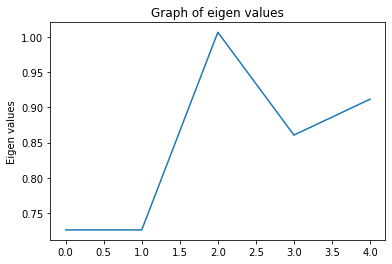

In [6]:
plt.plot(abs(eigA))
plt.title('Graph of eigen values')
plt.ylabel('Eigen values')
plt.show()

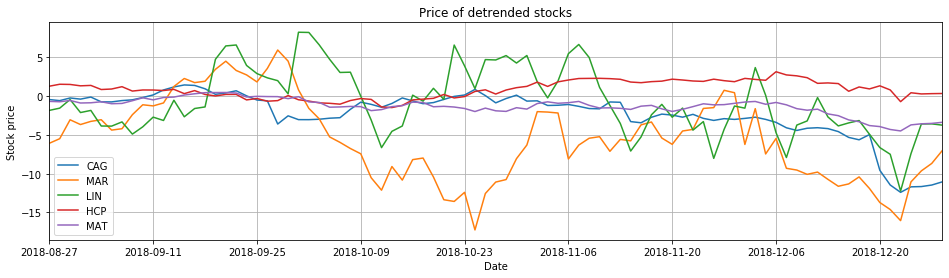

In [27]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(111)

stocks_detrended.dropna().plot(ax = ax1)
plt.title('Price of detrended stocks')
plt.ylabel('Stock price')
plt.grid()
plt.savefig("stocks")
plt.show()

In [30]:
info

,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
0,3M Company,MMM,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,Abbott Laboratories,ABT,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,AbbVie Inc.,ABBV,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABIOMED Inc,ABMD,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,Accenture plc,ACN,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,Xylem Inc.,XYL,reports,Industrials,Industrial Machinery,"White Plains, New York",2011-11-01,1524472,NaN
501,Yum! Brands Inc,YUM,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
502,Zimmer Biomet Holdings,ZBH,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN
503,Zions Bancorp,ZION,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,NaN


In [31]:
#question5

eigAList = []
eigList = []
sectorList = []
for sector in info['GICS Sector'].unique():
    sectorList.append(sector)
    tickers = info.loc[info['GICS Sector'] == sector]['Symbol'].tolist()
    s_stocks = df[tickers]
    g_stocks_ma = s_stocks.rolling(window=66).mean()
    g_stocks_detrended = s_stocks.sub(g_stocks_ma).dropna()
    model = VAR(g_stocks_detrended)
    results = model.fit(1)
    A = results.params[1:].values
    eigA, _ = np.linalg.eig(A)
    eigAList.append(max(abs(eigA)))
    eigList.append(eigA)

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index

In [40]:
sector_eig = pd.Series(eigAList, sectorList)

In [41]:
sector_eig

Industrials               0.991721
Health Care               0.994153
Information Technology    0.992738
Communication Services    0.982263
Consumer Discretionary    0.990650
Utilities                 0.985648
Financials                1.004340
Materials                 0.991744
Real Estate               0.982785
Consumer Staples          0.991508
Energy                    0.985577
dtype: float64

In [ ]:
info[]